<a href="https://colab.research.google.com/github/mesogin/TIS2/blob/main/7_1_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##인공 신경망

In [ ]:
# 텐서플로우 임포트

import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
# 텐서플로우의 keras 패키지 임포트

from tensorflow import keras
keras.__version__

'2.11.0'

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

###패션 MNIST
패션 MNIST데이터는 디ㅣㅂ러닝 라이브러리에서 이데이터를 가져올 수 있는 도구를 제공하고 있음.

In [ ]:
# 패션 MNIST 데이터 다운로드

from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
#input 과 target배열의  차원 알아보기
print(train_input.ndim)
print(train_target.ndim)

3
1


In [ ]:
#0번째 이미지에서 0번째 행에 포함된 데이터 뽑아오기
print(train_input[0,0,:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#연습문제
#train_input의 3번째 ~ 4번쨰 행을 추출하시오
print(train_input[0, 3:5, :])

[[  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


In [ ]:
#연습문제 
# 0부터 100까지의 타겟값을 출력해보세요
print(train_target[:101])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8 8]


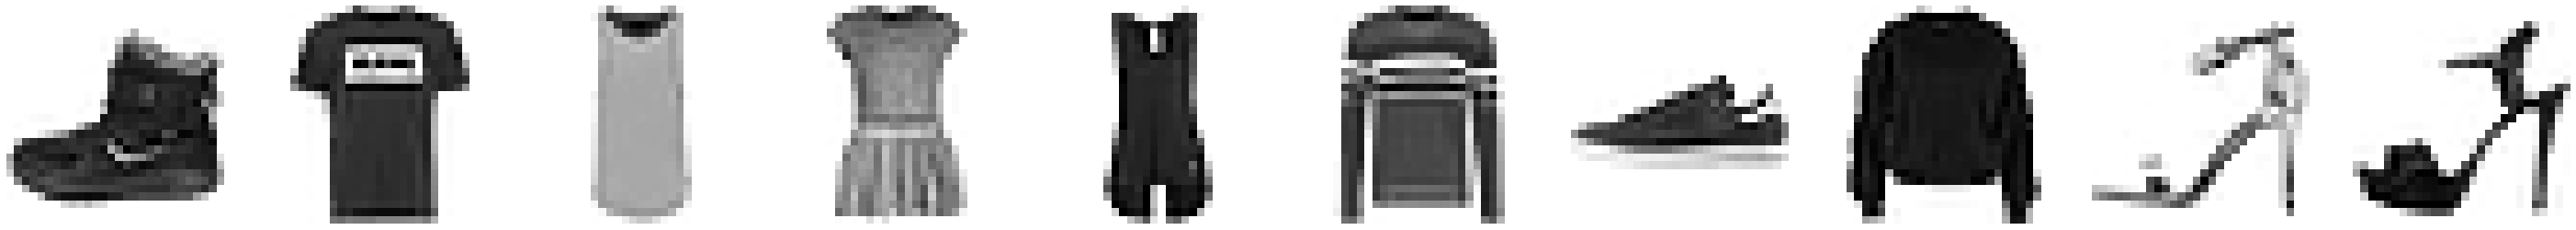

In [ ]:
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력

import matplotlib.pyplot as plt
#1부터 10까지 size는 500,500으로
fig, axs = plt.subplots(1, 10, figsize=(50,50))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

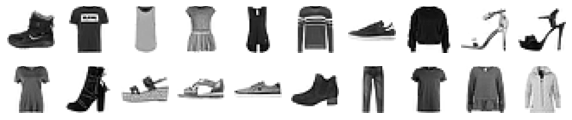

In [ ]:
#연습문제
#처음 input 데이터에서 처음 20개의 이미지 데이터를 선택하여 (2행 10열) 형태의 이미지로 그려보세요
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력

import matplotlib.pyplot as plt
#1부터 10까지 size는 500,500으로
fig, axs = plt.subplots(2, 10, figsize=(10,2))
for i in range(2):
  for j in range(10):
    axs[i][j].imshow(train_input[i*10+j],cmap='gray_r')
    axs[i][j].axis('off')

plt.show()

##데이터 정규화

In [ ]:
# 0~1 사이의 값으로 정규화한 후
# reshape() 메서드로 2차원 배열인 각 샘플을 1차원 배열로 펼침

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
# 변환된 train_scaled의 크기 확인

print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
import numpy as np

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=9, random_state=42) # 반복횟수는 5번으로 지정

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303666666666667


##텐서플로, 케라스

In [63]:
import tensorflow as tf

In [64]:
from tensorflow import keras

In [66]:
# 모델 평가(검증)을 위해 훈련세트에서 검증 세트(validation set)를 분리
#훈련세트에서도 8ㄷ2로 나눠 최적의 훈련상태로 만듦
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [67]:
# 훈련세트의 크기 확인

print(train_scaled.shape, train_target.shape)

(38400, 784) (38400,)


In [68]:
# 검증세트의 크기 확인

print(val_scaled.shape, val_target.shape)

(9600, 784) (9600,)


In [69]:
# 첫 번째 신경망 구성
# 케라스의 Dense 클래스를 이용한 완전연결층(fully connected layer) 구성

# 10: 뉴런(유닛) 개수
# activation='softmax': 뉴런의 출력에 적용할 함수
# input_shape=(784,) : 입력의 크기dct_d_b

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [70]:
# 모델 구성
# 케라스의 Sequential 클래스 사용

model = keras.Sequential(dense)

In [71]:
#모델 훈련 전 설정 단계
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [72]:
# 확인

print(train_target[:10])

[9 4 9 0 4 9 3 6 4 7]


In [73]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 4s 2ms/step - loss: 0.6346 - accuracy: 0.7849
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4881 - accuracy: 0.8329
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.4593 - accuracy: 0.8439
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.4456 - accuracy: 0.8481
Epoch 5/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4365 - accuracy: 0.8514


In [74]:
#모델 성능 확인
#케라스이ㅡ 모델 성능 평가 메서드: evaluate()
model.evaluate(val_scaled, val_target)

300/300 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8630


[0.42295506596565247, 0.8630208373069763]